# Sentiment Prediction:
- Logistic Regression
- Random Forest

In [1]:
import pandas as pd
import numpy as np
import sklearn
import spacy 

In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [9]:
df = pd.read_csv('english_replies.csv')

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,X.1,X,user_id.x,status_id,created_at.x,screen_name.x,text,source.x,...,profile_image_url.y,W,L,D,date,W_true,year,Subjectivity,Polarity,Analysis
0,0,5118,6141,1,2.468828e+09,1.161790e+18,2019-08-14 23:59:41,muttle9,4-3-3 works extremely well!,Twitter for Android,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,1.000000,-0.15625,Negative
1,2,5120,6143,3,7.086827e+17,1.161789e+18,2019-08-14 23:58:43,amirshwki,Great game\nKeep up\nLove from IRAQ,Twitter for iPhone,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.583333,0.30000,Positive
2,3,5121,6145,5,8.380335e+17,1.161789e+18,2019-08-14 23:58:23,pbanks5050,"All day, Everyday !",Twitter for iPhone,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.600000,-0.25000,Negative
3,4,5122,6146,6,1.087478e+18,1.161789e+18,2019-08-14 23:57:21,MyrtilNathanae1,I trust in Frank Lampard and it's gonna be a ...,Twitter for Android,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive
4,5,5123,6147,7,1.087478e+18,1.161789e+18,2019-08-14 23:56:28,MyrtilNathanae1,Great night guys just keep working and I tru...,Twitter for Android,...,http://pbs.twimg.com/profile_images/1338595356...,0,1,0,2019-08-14,0,2019,0.750000,0.80000,Positive


In [11]:
len(df)

32322

# First Predictive Model with Logistic Regression on Replies (column = text) and Sentiment (column = Analysis)

In [12]:
from sklearn.model_selection import train_test_split
replies = df['text'].values
labels = df['Analysis'].values
replies_train, replies_test, y_train, y_test = train_test_split(replies, labels, test_size=0.2, random_state=1000)

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(replies_train)

C:\Users\rache\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function spacy_tokenizer at 0x00000144247ECAF0>)

In [9]:
X_train = vectorizer.transform(replies_train)
X_test = vectorizer.transform(replies_test)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
accuracy = classifier.score(X_test, y_test)

In [12]:
print(accuracy)

0.5664346481051817


# Remove Stopwords and Punctuation from 'text' column to see if Sentiment Improves with Logistic Regression

In [27]:
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
ndf = df[['text', 'Subjectivity', 'Polarity', 'Analysis']]

In [96]:
ndf.head()

,text,Subjectivity,Polarity,Analysis
0,4-3-3 works extremely well!,1.000000,-0.15625,Negative
1,Great game\nKeep up\nLove from IRAQ,0.583333,0.30000,Positive
2,"All day, Everyday !",0.600000,-0.25000,Negative
3,I trust in Frank Lampard and it's gonna be a ...,0.750000,0.80000,Positive
4,Great night guys just keep working and I tru...,0.750000,0.80000,Positive


In [97]:
len(ndf)

32322

In [98]:
ndf['text'] = ndf['text'].str.lower()

<ipython-input-98-ca8e42417579>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
# removing numbers from the text column
ndf['text'] = ndf['text'].str.replace('\d+', '')

<ipython-input-99-8675d68fe575>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
# removing punctuation from the text column
ndf["text"] = ndf['text'].str.replace('[^\w\s]','')

<ipython-input-100-3c0b113ea253>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
# remove '\n' from text
ndf["text"] = ndf['text'].str.replace('[\n]',' ')

<ipython-input-101-a1057f7a0db0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
ndf.head()

,text,Subjectivity,Polarity,Analysis
0,works extremely well,1.000000,-0.15625,Negative
1,great game keep up love from iraq,0.583333,0.30000,Positive
2,all day everyday,0.600000,-0.25000,Negative
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive


# Remove Stopwords

In [127]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

In [104]:
ndf["text_no_stops"] = ndf["text"].str.lower()

<ipython-input-104-e32e0aa1ebd7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
ndf["no_stops"] = ndf["text"].str.lower().str.split()

<ipython-input-111-663c8f4f1fb3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
ndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]"
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]"
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]"
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna..."
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,..."


In [119]:
ndf['text'] = ndf['text'].astype('string')

<ipython-input-119-81181b711ae1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32322 entries, 0 to 32321
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           32322 non-null  string 
 1   Subjectivity   32322 non-null  float64
 2   Polarity       32322 non-null  float64
 3   Analysis       32322 non-null  object 
 4   text_no_stops  32322 non-null  object 
 5   no_stops       32322 non-null  object 
 6   replies        32322 non-null  string 
dtypes: float64(2), object(3), string(2)
memory usage: 1.7+ MB


In [121]:
ndf['replies'] = ndf['text']

<ipython-input-121-c27c22cc416c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
ndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]",works extremely well
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]",all day everyday
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...


In [137]:
ndf['test'] = ndf['no_stops'].apply(lambda x: [item for item in x if item not in stop])

<ipython-input-137-d7a3deb44268>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
ndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies,test
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]",works extremely well,"[works, extremely, well]"
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq,"[great, game, keep, love, iraq]"
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]",all day everyday,"[day, everyday]"
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...,"[trust, frank, lampard, gonna, great, season]"
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...,"[great, night, guys, keep, working, trust]"


In [140]:
ndf['test1'] = ndf['test'].astype('string')

<ipython-input-140-6f60462c44ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
ndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies,test,test1
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]",works extremely well,"[works, extremely, well]","['works', 'extremely', 'well']"
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq,"[great, game, keep, love, iraq]","['great', 'game', 'keep', 'love', 'iraq']"
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]",all day everyday,"[day, everyday]","['day', 'everyday']"
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...,"[trust, frank, lampard, gonna, great, season]","['trust', 'frank', 'lampard', 'gonna', 'great'..."
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...,"[great, night, guys, keep, working, trust]","['great', 'night', 'guys', 'keep', 'working', ..."


In [142]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32322 entries, 0 to 32321
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           32322 non-null  string 
 1   Subjectivity   32322 non-null  float64
 2   Polarity       32322 non-null  float64
 3   Analysis       32322 non-null  object 
 4   text_no_stops  32322 non-null  object 
 5   no_stops       32322 non-null  object 
 6   replies        32322 non-null  string 
 7   test           32322 non-null  object 
 8   test1          32322 non-null  string 
dtypes: float64(2), object(4), string(3)
memory usage: 2.2+ MB


# Recalculate Subjectivity, Polarity, Analysis

In [143]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
ndf['sub'] = ndf['test1'].apply(getSubjectivity)
ndf['pol'] = ndf['test1'].apply(getPolarity)

<ipython-input-143-d70277455f90>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-143-d70277455f90>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
ndf['sentiment'] = ndf['Polarity'].apply(getAnalysis)

<ipython-input-145-7fec605b7343>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
ndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies,test,test1,sub,pol,sentiment
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]",works extremely well,"[works, extremely, well]","['works', 'extremely', 'well']",1.000000,-0.125,Negative
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq,"[great, game, keep, love, iraq]","['great', 'game', 'keep', 'love', 'iraq']",0.583333,0.300,Positive
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]",all day everyday,"[day, everyday]","['day', 'everyday']",0.600000,-0.200,Negative
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...,"[trust, frank, lampard, gonna, great, season]","['trust', 'frank', 'lampard', 'gonna', 'great'...",0.750000,0.800,Positive
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...,"[great, night, guys, keep, working, trust]","['great', 'night', 'guys', 'keep', 'working', ...",0.750000,0.800,Positive


In [159]:
pos = ndf.loc[(ndf['sentiment'] == 'Positive')]

In [162]:
pos = pos[['text', 'test1', 'sentiment']]

In [198]:
len(pos)

12144

In [169]:
neg = ndf.loc[(ndf['sentiment'] == 'Negative')]

In [170]:
neg = neg[['text', 'test1', 'sentiment']]

In [199]:
len(neg)

6150

In [172]:
neu = ndf.loc[(ndf['sentiment'] == 'Neutral')]

In [173]:
neu = neu[['text', 'test1', 'sentiment']]

In [163]:
from collections import Counter

def getMostCommonWords(reviews, n_most_common, stopwords=None):
    # param reviews: column from pandas.DataFrame (e.g. df['Reviews']) 
        #(pandas.Series)
    # param n_most_common: the top n most common words in reviews (int)
    # param stopwords: list of stopwords (str) to remove from reviews (list)
    # Returns list of n_most_common words organized in tuples as 
        #('term', frequency) (list)

    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # remove stopwords, if applicable
    if stopwords:
        flattened_reviews = [word for word in flattened_reviews if \
                             word not in stopwords]


    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

# Calculate the Most Common Words for the Positive, Negative, Neutral Tweets

In [221]:
# positive tweets
getMostCommonWords(pos['test1'], 30)

[('good', 1585),
 ('chelsea', 1576),
 ('team', 1247),
 ('lampard', 1221),
 ('win', 1012),
 ('great', 926),
 ('better', 924),
 ('need', 833),
 ('game', 832),
 ('players', 814),
 ('love', 771),
 ('best', 704),
 ('today', 700),
 ('back', 664),
 ('play', 625),
 ('well', 586),
 ('one', 581),
 ('get', 555),
 ('like', 554),
 ('us', 546),
 ('season', 528),
 ('performance', 515),
 ('time', 501),
 ('dont', 499),
 ('goal', 489),
 ('really', 469),
 ('keep', 449),
 ('frank', 446),
 ('first', 446),
 ('player', 433)]

In [222]:
# negative tweets
getMostCommonWords(neg['test1'],30)

[('game', 1215),
 ('lampard', 994),
 ('chelsea', 793),
 ('team', 584),
 ('players', 435),
 ('poor', 433),
 ('us', 379),
 ('play', 369),
 ('dont', 367),
 ('bad', 357),
 ('need', 335),
 ('today', 320),
 ('like', 319),
 ('cant', 308),
 ('fuck', 303),
 ('back', 294),
 ('shit', 289),
 ('mount', 276),
 ('get', 272),
 ('time', 268),
 ('season', 259),
 ('barkley', 256),
 ('u', 244),
 ('frank', 241),
 ('good', 236),
 ('willian', 235),
 ('kepa', 234),
 ('fucking', 232),
 ('one', 227),
 ('pulisic', 227)]

In [223]:
# neutral tweets
getMostCommonWords(neu['test1'], 30)

[('chelsea', 976),
 ('lampard', 854),
 ('well', 574),
 ('pulisic', 424),
 ('dont', 403),
 ('mount', 397),
 ('man', 389),
 ('play', 388),
 ('willian', 386),
 ('barkley', 384),
 ('team', 377),
 ('need', 375),
 ('please', 367),
 ('back', 363),
 ('done', 326),
 ('like', 322),
 ('match', 313),
 ('get', 310),
 ('us', 301),
 ('always', 298),
 ('blue', 287),
 ('go', 285),
 ('jorginho', 285),
 ('pedro', 267),
 ('players', 263),
 ('u', 254),
 ('frank', 252),
 ('today', 250),
 ('one', 247),
 ('come', 246)]

In [256]:
# pndf = positive, negative dataframe (excluding neutral)
pndf = ndf.loc[(ndf['sentiment'] != 'Neutral')]

In [257]:
len(pndf)

18294

In [258]:
pndf.head()

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies,test,test1,sub,pol,sentiment
0,works extremely well,1.000000,-0.15625,Negative,works extremely well,"[works, extremely, well]",works extremely well,"[works, extremely, well]","['works', 'extremely', 'well']",1.000000,-0.125,Negative
1,great game keep up love from iraq,0.583333,0.30000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq,"[great, game, keep, love, iraq]","['great', 'game', 'keep', 'love', 'iraq']",0.583333,0.300,Positive
2,all day everyday,0.600000,-0.25000,Negative,all day everyday,"[all, day, everyday]",all day everyday,"[day, everyday]","['day', 'everyday']",0.600000,-0.200,Negative
3,i trust in frank lampard and its gonna be a g...,0.750000,0.80000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...,"[trust, frank, lampard, gonna, great, season]","['trust', 'frank', 'lampard', 'gonna', 'great'...",0.750000,0.800,Positive
4,great night guys just keep working and i tru...,0.750000,0.80000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...,"[great, night, guys, keep, working, trust]","['great', 'night', 'guys', 'keep', 'working', ...",0.750000,0.800,Positive


In [259]:
pndf['label'] = pndf['sentiment']

<ipython-input-259-9c0953dc9126>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [261]:
pndf.replace({'label' : {'Positive' : 1, 'Negative' : 0}})

,text,Subjectivity,Polarity,Analysis,text_no_stops,no_stops,replies,test,test1,sub,pol,sentiment,label
0,works extremely well,1.000000,-0.156250,Negative,works extremely well,"[works, extremely, well]",works extremely well,"[works, extremely, well]","['works', 'extremely', 'well']",1.000000,-0.125000,Negative,0
1,great game keep up love from iraq,0.583333,0.300000,Positive,great game keep up love from iraq,"[great, game, keep, up, love, from, iraq]",great game keep up love from iraq,"[great, game, keep, love, iraq]","['great', 'game', 'keep', 'love', 'iraq']",0.583333,0.300000,Positive,1
2,all day everyday,0.600000,-0.250000,Negative,all day everyday,"[all, day, everyday]",all day everyday,"[day, everyday]","['day', 'everyday']",0.600000,-0.200000,Negative,0
3,i trust in frank lampard and its gonna be a g...,0.750000,0.800000,Positive,i trust in frank lampard and its gonna be a g...,"[i, trust, in, frank, lampard, and, its, gonna...",i trust in frank lampard and its gonna be a g...,"[trust, frank, lampard, gonna, great, season]","['trust', 'frank', 'lampard', 'gonna', 'great'...",0.750000,0.800000,Positive,1
4,great night guys just keep working and i tru...,0.750000,0.800000,Positive,great night guys just keep working and i tru...,"[great, night, guys, just, keep, working, and,...",great night guys just keep working and i tru...,"[great, night, guys, keep, working, trust]","['great', 'night', 'guys', 'keep', 'working', ...",0.750000,0.800000,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32309,sarriball is the best,0.300000,1.000000,Positive,sarriball is the best,"[sarriball, is, the, best]",sarriball is the best,"[sarriball, best]","['sarriball', 'best']",0.300000,1.000000,Positive,1
32310,we love you super frank,0.633333,0.416667,Positive,we love you super frank,"[we, love, you, super, frank]",we love you super frank,"[love, super, frank]","['love', 'super', 'frank']",0.633333,0.416667,Positive,1
32314,lots of positives to take from this game we c...,0.457143,0.314286,Positive,lots of positives to take from this game we c...,"[lots, of, positives, to, take, from, this, ga...",lots of positives to take from this game we c...,"[lots, positives, take, game, created, many, g...","['lots', 'positives', 'take', 'game', 'created...",0.450000,0.366667,Positive,1
32316,disappointed,0.750000,-0.750000,Negative,disappointed,[disappointed],disappointed,[disappointed],['disappointed'],0.750000,-0.750000,Negative,0


# Rerun Analyses Using Only Positive and Negative as Classification Predictors (pndf)

# Run Random Forest, Including Neutral Tweets

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(ndf['test1'])
labels = ndf['sentiment']

In [176]:
len(vectorizer.get_feature_names())

16911

In [177]:
vectorizer = TfidfVectorizer(min_df=15)
bow = vectorizer.fit_transform(ndf['test1'])
len(vectorizer.get_feature_names())

1794

In [178]:
from sklearn.feature_selection import SelectKBest, chi2
# select the 200 features that have the strongest correlation to a class from the
# remaining 308 features.
selected_features = \
SelectKBest(chi2, k=200).fit(bow, labels).get_support(indices=True)

In [180]:
vectorizer = TfidfVectorizer(min_df=15, vocabulary=selected_features)

bow = vectorizer.fit_transform(ndf['test1'])
bow

<32322x200 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.33)

In [182]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [183]:
classifier = rfc()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.4340489359707509

# Run Random Forest, Excluding Neutral Tweets

In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(pndf['test1'])
labels = pndf['sentiment']

In [322]:
len(vectorizer.get_feature_names())

13484

In [323]:
vectorizer = TfidfVectorizer(min_df=15)
bow = vectorizer.fit_transform(pndf['test1'])
len(vectorizer.get_feature_names())

1488

In [324]:
#Import Different types of models
from sklearn.ensemble import RandomForestClassifier

# Cross Validation Imports
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# package for accuracy calculation
from sklearn import metrics

In [325]:
from sklearn.feature_selection import SelectKBest, chi2
# select the 200 features that have the strongest correlation to a class from the
# remaining 308 features.
selected_features = \
SelectKBest(chi2, k=200).fit(bow, labels).get_support(indices=True)

In [326]:
vectorizer = TfidfVectorizer(min_df=15, vocabulary=selected_features)

bow = vectorizer.fit_transform(pndf['test1'])
bow

<18294x200 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [327]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.33)

In [328]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [329]:
classifier = rfc()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.6662802252401457

In [330]:
RF = classifier.fit(X_train, y_train)

In [331]:
y_pred = RF.predict(X_test)

In [332]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6662802252401457


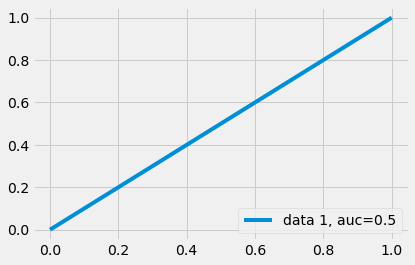

In [333]:
# ROC
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Positive')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression, Including Neutral Tweets

In [334]:
from sklearn.model_selection import train_test_split
replies3 = ndf['test1'].values
labels3 = ndf['sentiment'].values
replies_train, replies_test, y_train, y_test = train_test_split(replies3, labels3, test_size=0.2, random_state=4000)

In [306]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [307]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(replies_train)

C:\Users\rache\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



CountVectorizer(tokenizer=<function spacy_tokenizer at 0x000001443CE1B820>)

In [308]:
X_train = vectorizer.transform(replies_train)
X_test = vectorizer.transform(replies_test)

In [309]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [310]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.5583913379737045


# Logistic Regression, Excluding Neutral Tweets

In [336]:
from sklearn.model_selection import train_test_split
replies4 = pndf['test1'].values
labels4 = pndf['sentiment'].values
replies_train, replies_test, y_train, y_test = train_test_split(replies4, labels4, test_size=0.33, random_state=70)

In [337]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() 
        for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [338]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(replies_train)

C:\Users\rache\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



CountVectorizer(tokenizer=<function spacy_tokenizer at 0x000001443C314310>)

In [339]:
X_train = vectorizer.transform(replies_train)
X_test = vectorizer.transform(replies_test)

In [340]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [341]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.667108314011262


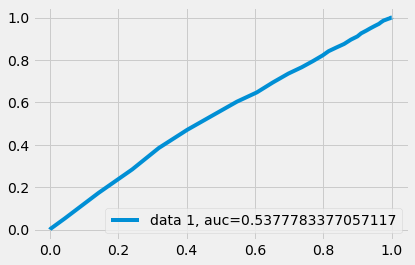

In [342]:
# ROC
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Positive')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()